In [103]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn as skl
from sklearn import tree
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import time
import matplotlib.pyplot as plt 

In [30]:
# Constants
FEATURE_FILE_NAME_TRAIN = 'Data/train-features.txt'
TARGET_FILE_NAME_TRAIN = 'Data/train-labels.txt'

FEATURE_FILE_NAME_TEST = 'Data/test-features.txt'
TARGET_FILE_NAME_TEST = 'Data/test-labels.txt'

N_COL = 2500 # number of unique words from dataset

# number of data entries
N_ROW_TRAIN = 700 
N_ROW_TEST = 260

In [31]:
def create_df(feature_file, target_file, n_col, n_row):  
    # Initialze data frame
    df = pd.DataFrame(columns=range(1,n_col + 1), index=range(1, n_row + 1))
    # Import data and populate data frame
    with open(feature_file) as f:
        for _, line in enumerate(f):
            line = line.split(' ')  # each line in file
            doc = int(line[0])
            word_id = int(line[1])
            freq = int(line[2])     
            df[word_id][doc] = freq
    # Replace NaN with 0s
    df = df.fillna(0)

    # Add target to data frame
    email_label = pd.read_csv(target_file , sep=" ", header=None, names = ["target"])
    df['target'] = list(email_label['target']) 
    return df

In [32]:
def naive_bayes(train_set, test_set, features):
    start_time = time.time()
    # Instantiate the classifier
    gnb = skl.naive_bayes.MultinomialNB()
    # Train classifier
    gnb.fit(train_set[features].values, train_set["target"])
    # Predict
    y_pred = gnb.predict(test_set[features])
    
    # Report results
    print("Naive Bayes Results: ")
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print('accuracy_score: ', skl.metrics.accuracy_score(test_set["target"], y_pred,normalize=True))
    print('recall_score: ', skl.metrics.recall_score(test_set["target"], y_pred))
    print('precision_score: ', skl.metrics.precision_score(test_set["target"], y_pred))
    print('F_score: ', skl.metrics.f1_score(test_set["target"], y_pred))
    print('roc_curve: ', skl.metrics.roc_curve(test_set["target"], y_pred))
    print('confusion_matrix: ', skl.metrics.confusion_matrix(test_set["target"], y_pred))

In [33]:
def decision_tree(train_set, test_set, features):
    start_time = time.time()
    # Instantiate the classifier
    tree = skl.tree.DecisionTreeClassifier(criterion = "entropy")
    # Train classifier
    tree.fit(train_set[features].values, train_set['target'])
    # Predict
    y_pred = tree.predict(test_set[features])
    
    # Report results
    print("Decision Tree Results: ")
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print('accuracy_score: ', skl.metrics.accuracy_score(test_set["target"], y_pred,normalize=True))
    print('recall_score: ', skl.metrics.recall_score(test_set["target"], y_pred))
    print('precision_score: ', skl.metrics.precision_score(test_set["target"], y_pred))
    print('F_score: ', skl.metrics.f1_score(test_set["target"], y_pred))
    print('roc_curve: ', skl.metrics.roc_curve(test_set["target"], y_pred))
    print('confusion_matrix: ', skl.metrics.confusion_matrix(test_set["target"], y_pred))

In [34]:
def knn(train_set, test_set, features): 
    start_time = time.time()
    # Instantiate the classifier
    k_neighbors= skl.neighbors.KNeighborsClassifier()
    # Train classifier
    k_neighbors.fit(train_set[features].values, train_set['target'])
    # Predict
    y_pred = k_neighbors.predict(test_set[features])
    
    # Report results
    print("K Neighbors Results: ")
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print('accuracy_score: ', skl.metrics.accuracy_score(test_set["target"], y_pred,normalize=True))
    print('recall_score: ', skl.metrics.recall_score(test_set["target"], y_pred))
    print('precision_score: ', skl.metrics.precision_score(test_set["target"], y_pred))
    print('F_score: ', skl.metrics.f1_score(test_set["target"], y_pred))
    print('roc_curve: ', skl.metrics.roc_curve(test_set["target"], y_pred))
    print('confusion_matrix: ', skl.metrics.confusion_matrix(test_set["target"], y_pred))

In [37]:
def main():
    train_df = create_df(FEATURE_FILE_NAME_TRAIN, TARGET_FILE_NAME_TRAIN, N_COL, N_ROW_TRAIN)
    test_df = create_df(FEATURE_FILE_NAME_TEST, TARGET_FILE_NAME_TEST, N_COL, N_ROW_TEST)
    features = list(range(1, N_COL + 1)) # every word as a feature

    naive_bayes(train_df, test_df, features)
    decision_tree(train_df, test_df, features)
    knn(train_df, test_df, features)
    
if __name__ == "__main__":
    main()

Naive Bayes Results: 
Time taken: 0.06 seconds
accuracy_score:  0.9807692307692307
recall_score:  0.9923076923076923
precision_score:  0.9699248120300752
F_score:  0.9809885931558935
roc_curve:  (array([0.        , 0.03076923, 1.        ]), array([0.        , 0.99230769, 1.        ]), array([2, 1, 0]))
confusion_matrix:  [[126   4]
 [  1 129]]
Decision Tree Results: 
Time taken: 0.06 seconds
accuracy_score:  0.9423076923076923
recall_score:  0.9153846153846154
precision_score:  0.967479674796748
F_score:  0.9407114624505928
roc_curve:  (array([0.        , 0.03076923, 1.        ]), array([0.        , 0.91538462, 1.        ]), array([2, 1, 0]))
confusion_matrix:  [[126   4]
 [ 11 119]]
K Neighbors Results: 
Time taken: 0.66 seconds
accuracy_score:  0.9115384615384615
recall_score:  0.9846153846153847
precision_score:  0.8590604026845637
F_score:  0.9175627240143368
roc_curve:  (array([0.        , 0.16153846, 1.        ]), array([0.        , 0.98461538, 1.        ]), array([2, 1, 0]))
con

In [107]:
runtime = [0.06, 0.06, 0.66]

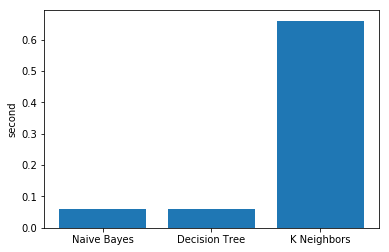

In [109]:
import matplotlib.pyplot as plt 

types = [1 ,2, 3]

plt.bar(types, runtime, align='center')

plt.xticks(types, ["Naive Bayes", "Decision Tree", "K Neighbors"])
plt.ylabel("second")
plt.show()

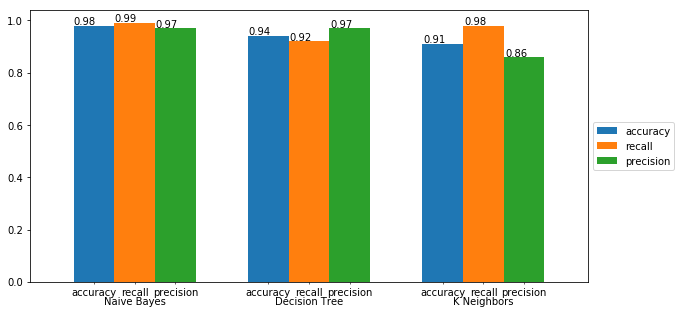

In [105]:
data = [[0.98, 0.99, 0.97], [0.94, 0.92, 0.97], [0.91, 0.98, 0.86]]
df = pd.DataFrame(data,index=["Naive Bayes", "Decision Tree", "K Neighbors"],
                 columns=pd.Index(["accuracy", "recall", "precision"]))
df.plot(kind='bar',figsize=(10,5), width=0.7)

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)

ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax.set_xticklabels(lab,minor=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.tick_params(axis='x', which='major', pad=15, size=0)
plt.setp(ax.get_xticklabels(), rotation=0)

plt.show()
